# Exercise K-Means
Again, fill the ellipses `...` with code, and don't remove `assert` lines.

### We will use the Iris dataset again.
Just goes to show that `sklearn` makes things way too easy.

In [2]:
# load our dataset
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()
X, Y = data['data'], data['target']

#import libraries
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from __future__ import print_function
import pandas as pd
import random as rd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
# split our data into training and testing set with 90:10 ratio
# use a fixed random state for reproducible results
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [4]:
# z-score normalization.
# Remember to scale the training and test set separately to avoid data snooping.
# We use the training set's mu and sigma for the test set.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### K-means clustering
Use the first 3 data points as initial cluster centroids (medoids anyone?)

Run the recaliberation step 10 times. Yes, it converges that quickly for a NP-hard problem.

In [5]:

# hàm vẽ dữ liệu 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()


In [6]:

# hàm gán nhãn điểm cho cluster gần nhất
def get_cluster_classification(x_data, centroids):
    '''
    A helper function that you will need later.
    Classifies the points to their nearest cluster.
    
    Input:
        x_data   : the data points
        centroids: the cluster centroids
    Output:
        The centroid numbers that each data point belongs to (i.e. is nearest)
    '''
    # IMPLEMENT HERE
    D = cdist(x_data, centroids, 'euclidean') 
    return np.argmin(D, axis = 1)
# get_cluster_classification(x_train, initial_centroids)

In [7]:
# cập nhật center mới dựa trên nhãn gán
def kmeans_update_centers(x_data, K):
    centroids=np.zeros((K, x_data.shape[1]))
    for k in range(K):
        Xk = x_data[k, :]
        centroids[k, :] = np.mean(Xk, axis = 0)
    return centroids
# trả về TRUE nếu hai tập center là như nhau
def has_converged(centroids, new_centroids):
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))



In [8]:
# print(initial_centroids)
# get_cluster_classification(x_train,initial_centroids)
# kmeans_update_centers(x_train, 3)


In [9]:
def kmeans(x_train, k, step):
    '''
    An implementation of K-means clustering.
    
    Input:
        k      : number of clusters
        x_train: training dataset
        step   : number of recaliberation steps
    Output:
        The centroids of the clusters (a k x d matrix)
    '''
    # IMPLEMENT HERE
    old_centroids=x_train[:k]
    for i in range(step):
        labels = get_cluster_classification(x_train, old_centroids)
        new_centroids = np.array([np.mean(x_train[labels == j], axis = 0) for j in range(k)])
        old_centroids = new_centroids
    return new_centroids
kmeans(x_train,3,10)


array([[-1.02028733,  0.90854287, -1.32521428, -1.27540932],
       [ 0.99363929,  0.01896468,  0.90355632,  0.92076921],
       [-0.22539812, -1.02749927,  0.23322382,  0.15491878]])

In [10]:
# # we know that there are three classes
# centroids = kmeans(x_train, k=3, step=10)
# assert np.allclose(centroids, np.array([
#     [-1.02028733,  0.90854287, -1.32521428, -1.27540932],
#     [ 0.99363929,  0.01896468,  0.90355632,  0.92076921],
#     [-0.22539812, -1.02749927,  0.23322382,  0.15491878]
# ])), "Incorrect centroids for K-means!"

C:\Users\Hung Zin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hung Zin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[-0.05519166 -0.88841598  0.33760519  0.2737293 ]
 [-1.03358934  0.84835232 -1.32732076 -1.27380566]
 [ 1.1192356   0.12363872  0.98132708  0.99787076]]


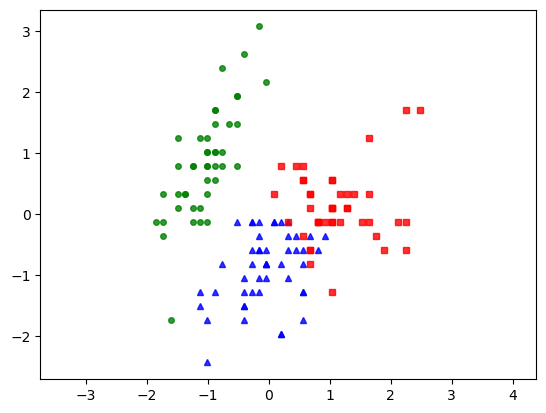

In [11]:
#đáp án nếu dùng scikit - learn
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_train)
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(x_train)
kmeans_display(x_train, pred_label)

### K-means++
Use the 4th data point as the intial centroid each step ([chosen with randomness](https://xkcd.com/221/)):
- The first initial centroid should be the 4th data point.
- The next initial centroids should be the 4th furthest data point.

In [12]:
def kmeanspp(x_train, k, step):
    '''
    An implementation of K-means++ clustering.
    
    Input:
        k      : number of clusters
        x_train: training dataset
        step   : number of recaliberation steps
    Output:
        The centroids of the clusters (a k x d matrix)
    '''
    # initialize the centroids according to the above criteria
    
    # IMPLEMENT HERE
    centroids = [] 
    centroids.append(x_train[3])
    #assign first centroids  
    current_centroid = x_train[3]
    #l
    for i in range(k-1): 
        lst = [] 
        for j in range(len(x_train)): 
            lst.append((euclidean_distance(current_centroid, x_train[j,:]), j))
        #find farthest point to current centroid 
        lst = sorted(lst, key = lambda x: -x[0])
        # make it be next centroid 
        current_centroid = x_train[lst[3][1]]
        centroids.append(current_centroid)
    # the rest should be identical to kmeans()
    for i in range(step) : 
        labels = get_cluster_classification(x_train,np.array(centroids))
        new_centroids = np.array([np.mean(x_train[j == labels], axis = 0) for j in range(k)])
        centroids = new_centroids
    return new_centroids



In [13]:
# now check if you did it correctly.
centroidspp = kmeanspp(x_train, k=3, step=10)
assert np.allclose(centroidspp, np.array([
    [-0.0118057 , -0.87997489,  0.36942197,  0.30573876],
    [ 1.15200055,  0.18878042,  0.98903982,  1.01136932],
    [-1.03358934,  0.84835232, -1.32732076, -1.27380566]
])), "Incorrect centroids for K-means++!"

NameError: name 'euclidean_distance' is not defined

### (Optional) Classification using clustering
We can treat each cluster to be of a different class, and the class with most points in each cluster is the classification for that cluster. Think voting.

In [ ]:
# get the associated classification for each cluster
def get_cluster_label(centroids, x_train, y_train):
    '''
    Get the classification for each cluster using training set.
    
    Input:
        centroids: the centroids of the clusters
        x_train  : features of training set
        y_train  : labels of training set
    Output:
        The classifications for the clusters.
    '''
    # remember to return a numpy array instead of a Python list!
    
    # IMPLEMENT HERE
    ...

In [ ]:
labels = get_cluster_label(centroids, x_train, y_train)
labelspp = get_cluster_label(centroidspp, x_train, y_train)
# each cluster nicely belongs to a different class
assert (labels == [0, 2, 1]).all(), "Incorrect K-means cluster label(s)!"
assert (labelspp == [1, 2, 0]).all(), "Incorrect K-means++ cluster label(s)!"

In [ ]:
def evaluate_kmeans_classification(centroids, labels, x_data):
    '''
    Get the classification for each data point using centroid labels.
    
    Input:
        centroids: the centroids of the clusters
        labels   : the labels for the clusters
        x_data   : the data to be classified
    Output:
        The classifications for the data.
    '''
    
    # IMPLEMENT HERE
    ...

In [ ]:
# evaluate the classifications
y_train_pred = evaluate_kmeans_classification(centroids, labels, x_train)
y_test_pred = evaluate_kmeans_classification(centroids, labels, x_test)
y_train_pred_pp = evaluate_kmeans_classification(centroidspp, labelspp, x_train)
y_test_pred_pp = evaluate_kmeans_classification(centroidspp, labelspp, x_test)

# and check for correctness
assert (y_train_pred == [2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2]).all()
assert (y_test_pred == [1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0]).all()
assert (y_train_pred_pp == [2, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2]).all()
assert (y_test_pred_pp == [1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0]).all()

In [ ]:
# evaluate prediction accuracy
print('[+] For K-means:')
train_score = np.sum(y_train_pred == y_train)
print(f'Training accuracy: {train_score / len(y_train) * 100:.4f}% ({train_score}/{len(y_train)})')
train_score = np.sum(y_test_pred == y_test)
print(f'Training accuracy: {train_score / len(y_test) * 100:.4f}% ({train_score}/{len(y_test)})')
print('[+] For K-means++:')
train_score = np.sum(y_train_pred_pp == y_train)
print(f'Training accuracy: {train_score / len(y_train) * 100:.4f}% ({train_score}/{len(y_train)})')
train_score = np.sum(y_test_pred_pp == y_test)
print(f'Training accuracy: {train_score / len(y_test) * 100:.4f}% ({train_score}/{len(y_test)})')

In [ ]:
# and plot out confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,10))
fig = plt.subplot(2, 2, 1)
sn.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cbar=False, square=True, linewidths=0.5)
fig.set_title('K-means, train set')

fig = plt.subplot(2, 2, 2)
sn.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cbar=False, square=True, linewidths=0.5)
fig.set_title('K-means, test set')

fig = plt.subplot(2, 2, 3)
sn.heatmap(confusion_matrix(y_train, y_train_pred_pp), annot=True, cbar=False, square=True, linewidths=0.5)
fig.set_title('K-means++, train set')

fig = plt.subplot(2, 2, 4)
sn.heatmap(confusion_matrix(y_test, y_test_pred_pp), annot=True, cbar=False, square=True, linewidths=0.5)
fig.set_title('K-means++, test set');